# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid')

In [3]:
tips = sns.load_dataset('tips')
#tips = pd.read_csv('c:\\Users\\Kishore\\Desktop\\Datasets\\pnewtips.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


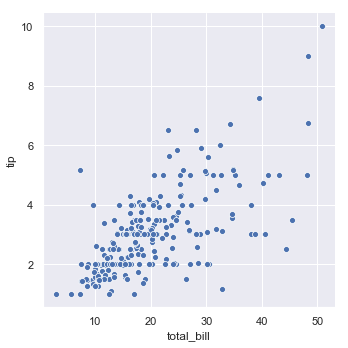

In [4]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

In [9]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

In [5]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

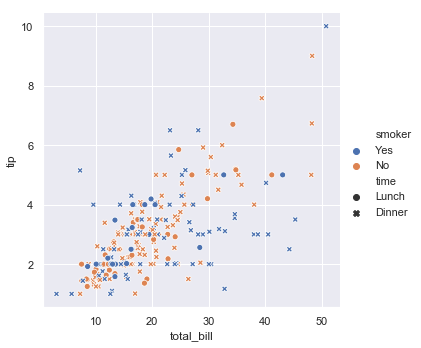

In [6]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

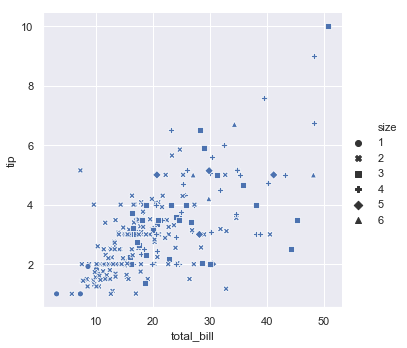

In [21]:
sns.relplot(x = 'total_bill', y = 'tip', style = 'size', data = tips)

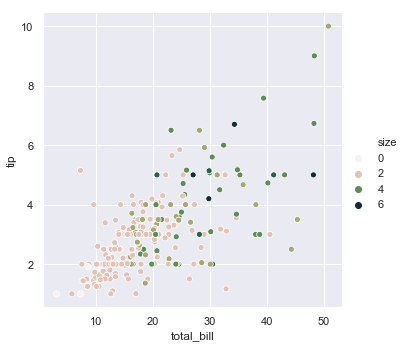

In [7]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips, palette = 'ch:r=-0.8, l= 0.95')

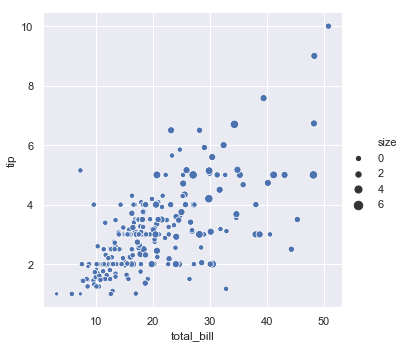

In [20]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

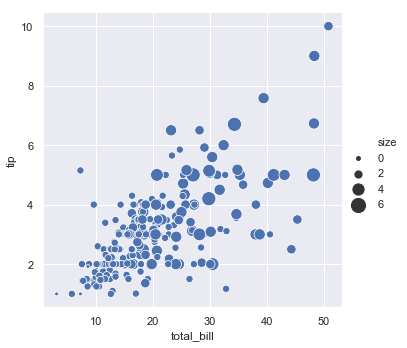

In [8]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15, 200))

In [9]:
from numpy.random import randn

In [10]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

In [11]:
df.head()

,time,value
0,0,0.418682
1,1,1.609784
2,2,-0.429545
3,3,-1.743068
4,4,-2.114451


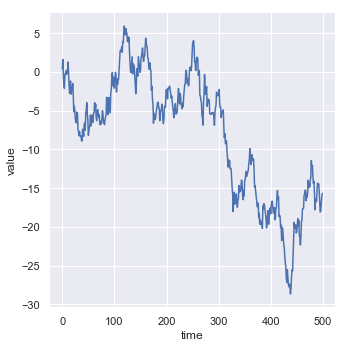

In [12]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [13]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])

In [14]:
df.head()

,time,value
0,-0.757190,0.871027
1,-2.442310,3.098146
2,-2.951197,3.155909
3,-2.481215,2.408442
4,-3.081529,1.808996


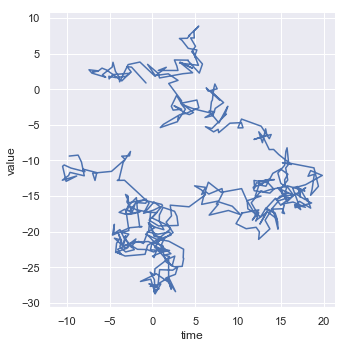

In [15]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = False)

In [18]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [19]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 29.1+ KB


In [20]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


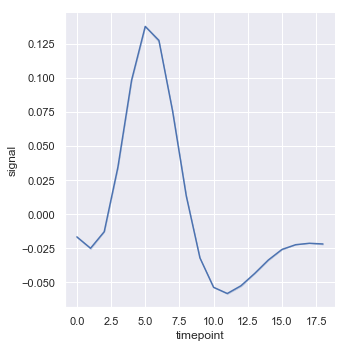

In [25]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = True)

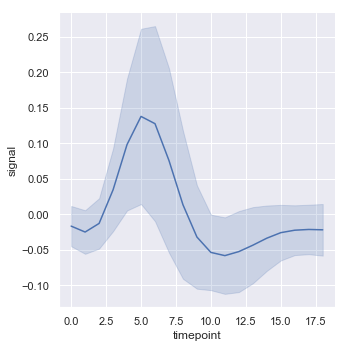

In [26]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')

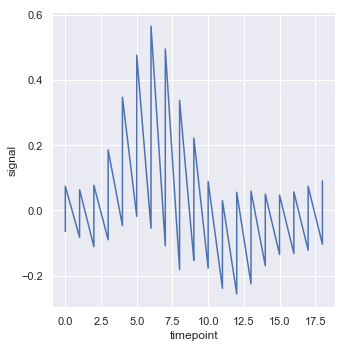

In [42]:
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)

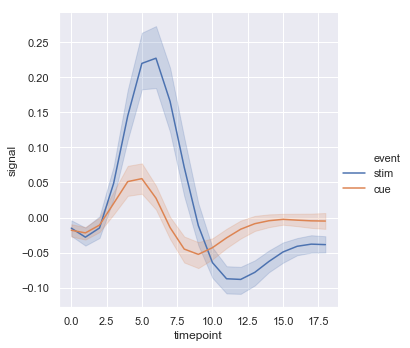

In [43]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)

In [44]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


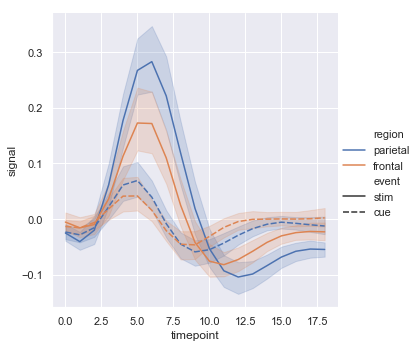

In [27]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)

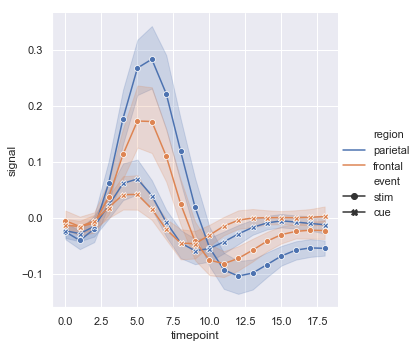

In [29]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri, markers = True, dashes = False)

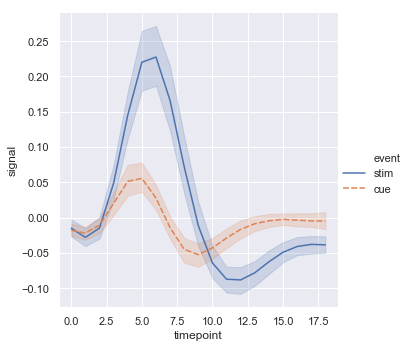

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

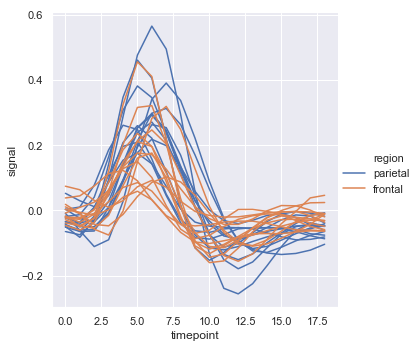

In [56]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', estimator = None, kind = 'line', data = fmri.query("event == 'stim'"))

In [53]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [30]:
dots = sns.load_dataset('dots').query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


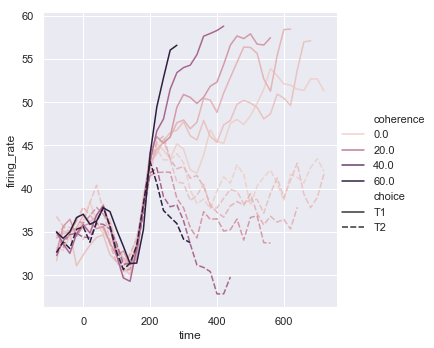

In [31]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

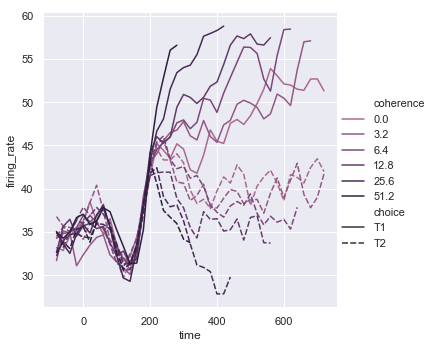

In [32]:
palette = sns.cubehelix_palette(light = 0.5, n_colors=6)
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette=palette)

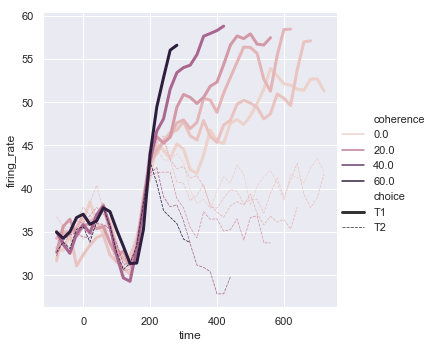

In [71]:
sns.relplot(x = 'time', y = 'firing_rate', hue = 'coherence', size = 'choice', style = 'choice', kind = 'line', data = dots)

In [33]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))

In [34]:
df.head()

,time,value
0,2019-06-02,2.932138
1,2019-06-03,2.141265
2,2019-06-04,1.992591
3,2019-06-05,2.781491
4,2019-06-06,3.327740


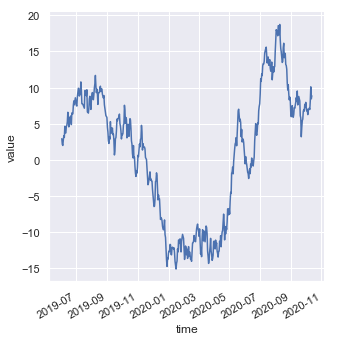

In [36]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


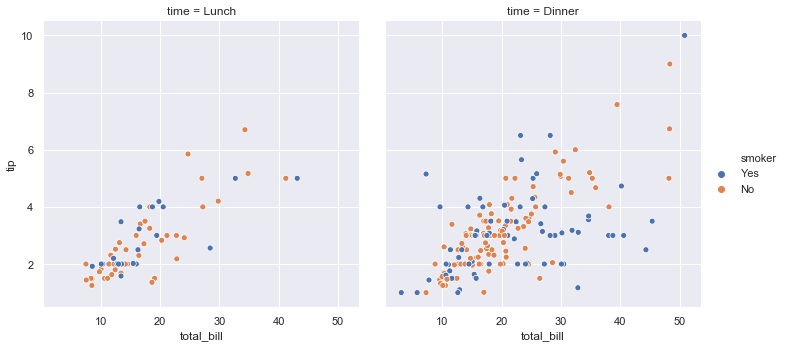

In [40]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time',col_wrap = 2,height = 5, data = tips)

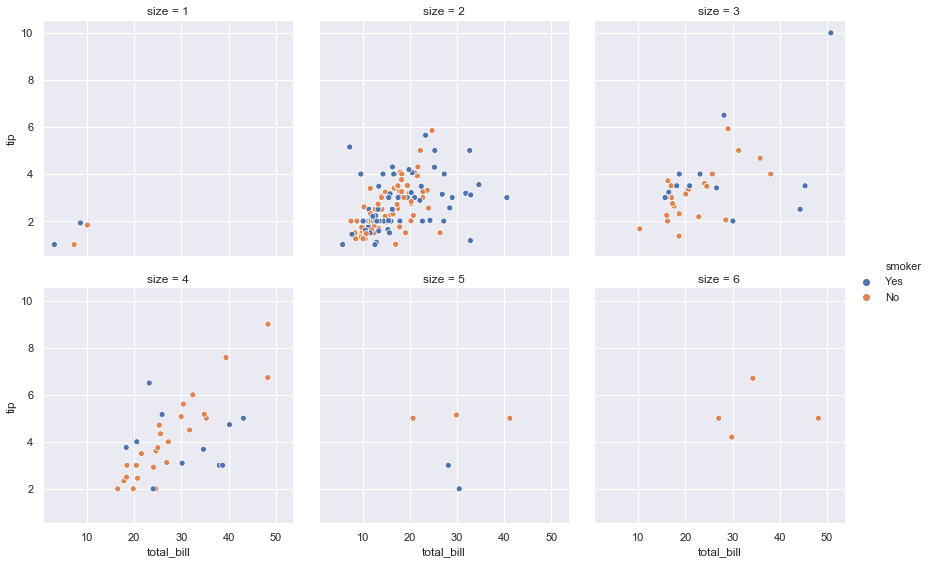

In [43]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size',col_wrap  =3,height =4, data = tips)

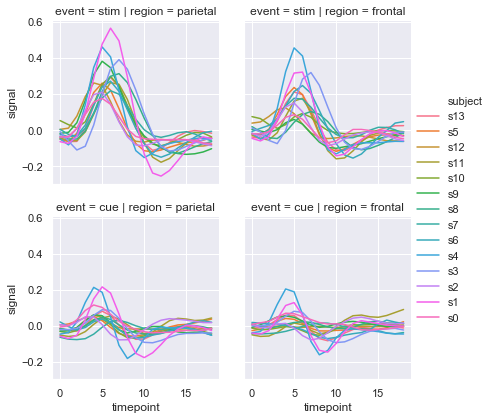

In [84]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height=3, kind = 'line', estimator = None, data = fmri)

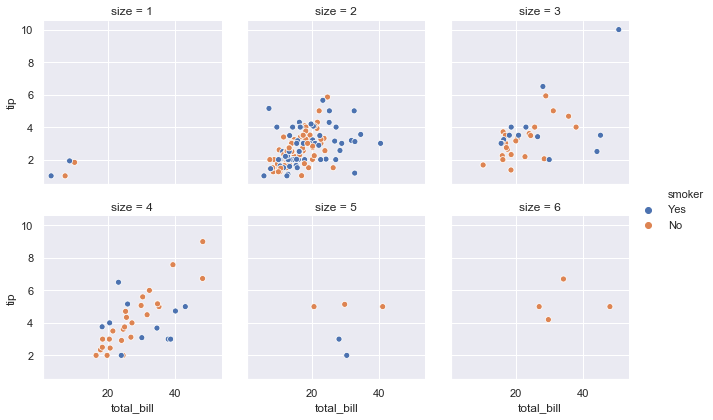

In [87]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips, col_wrap=3, height=3)

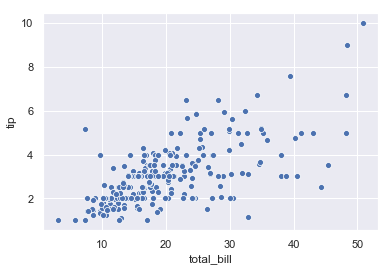

In [89]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

In [91]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


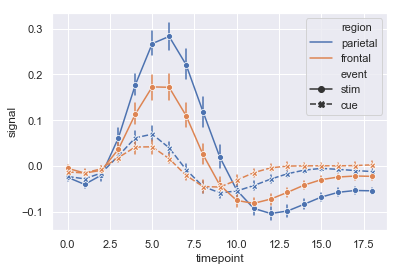

In [101]:
sns.lineplot(x = 'timepoint', y  = 'signal', style = 'event', hue = 'region', data = fmri, markers = True, ci = 68, err_style='bars')

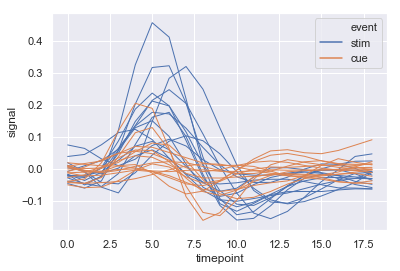

In [102]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', units = 'subject', estimator = None, lw = 1, data = fmri.query("region == 'frontal'"))

In [103]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


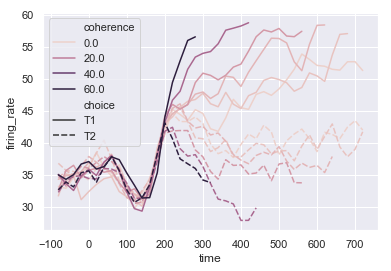

In [105]:
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence', style = 'choice', data = dots)

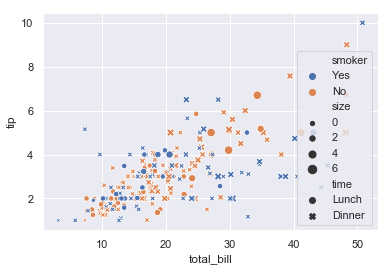

In [111]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

In [112]:
iris = sns.load_dataset('iris')

In [113]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


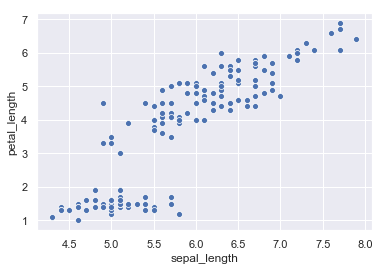

In [114]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

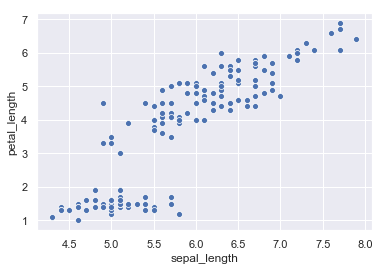

In [115]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

In [116]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [117]:
titanic = sns.load_dataset('titanic')

In [118]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [119]:
#catplot()

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


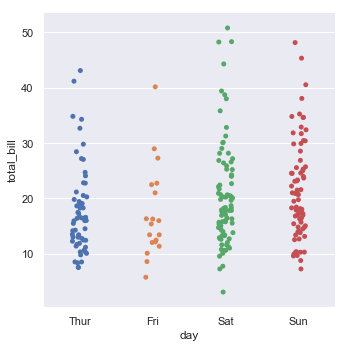

In [121]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

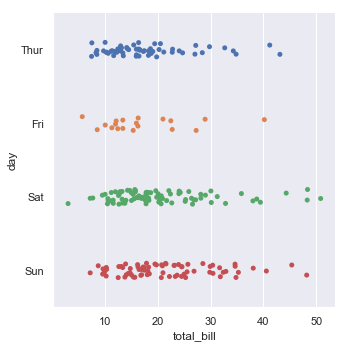

In [122]:
sns.catplot(y = 'day', x = 'total_bill', data = tips)

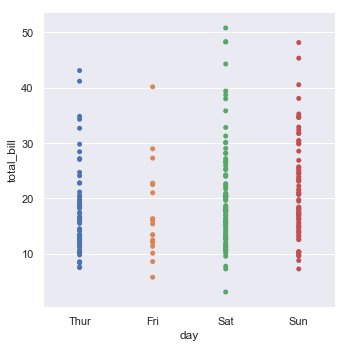

In [124]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

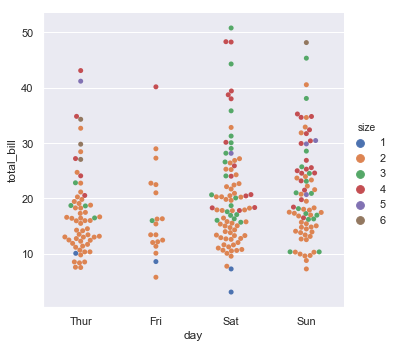

In [130]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'swarm', hue = 'size')

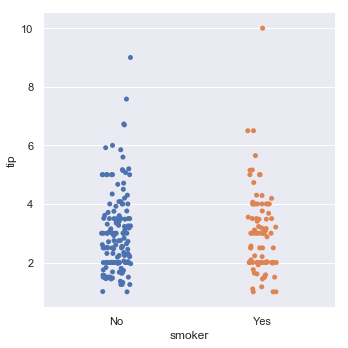

In [136]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order= ['No', 'Yes'])

In [132]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


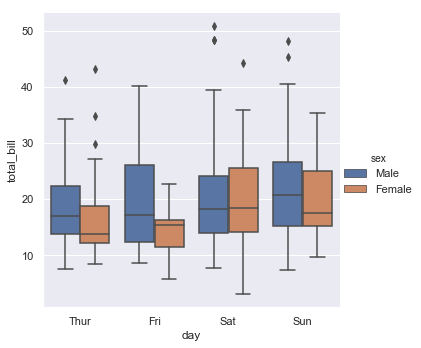

In [147]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex')

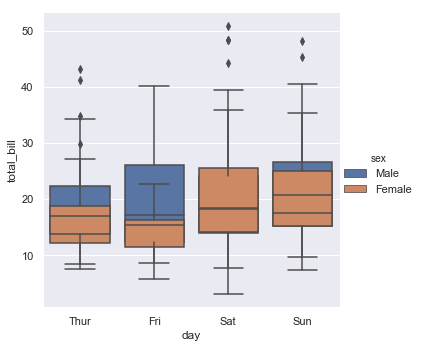

In [47]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex', dodge = False)

In [48]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


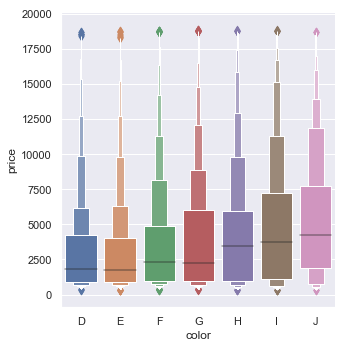

In [149]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

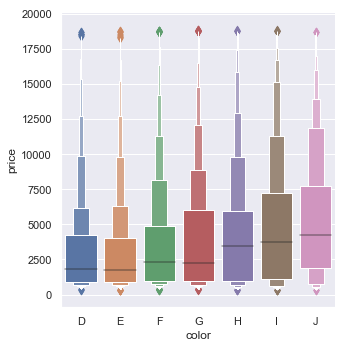

In [156]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

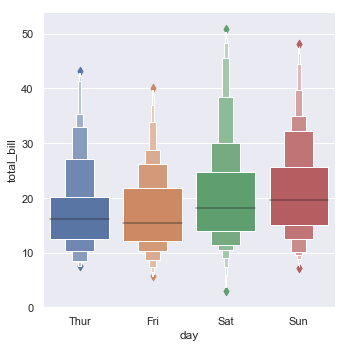

In [159]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'boxen', data = tips, dodge = False)

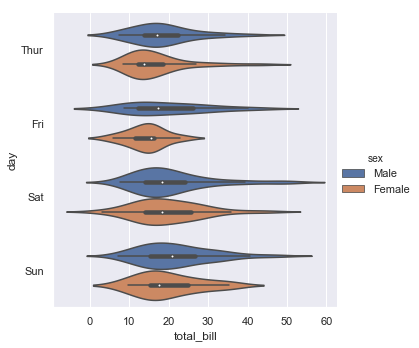

In [50]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', kind = 'violin', data = tips, split = False)

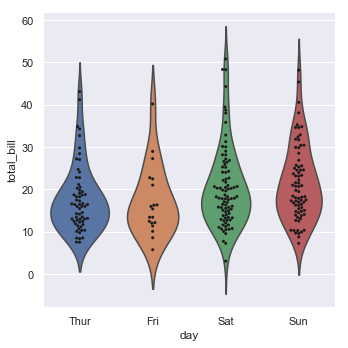

In [167]:
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', inner = None, data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k', size = 3, data = tips, ax = g.ax)

In [168]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


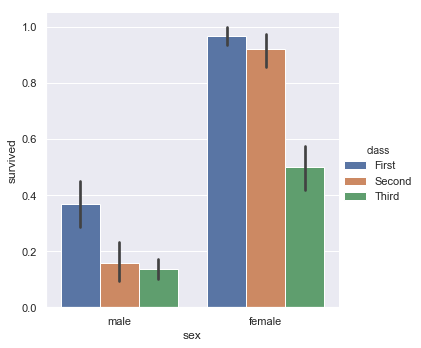

In [169]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic)

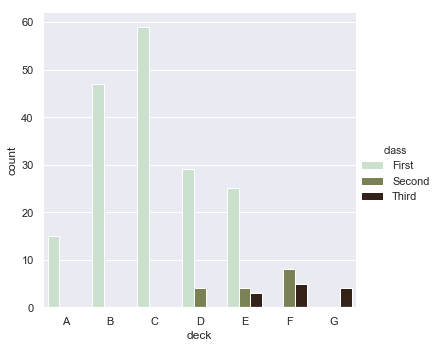

In [173]:
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic, hue = 'class')

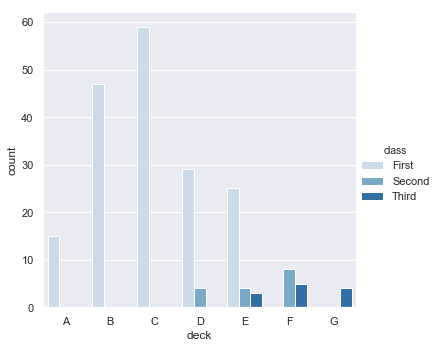

In [52]:

titanic = sns.load_dataset('titanic')
sns.catplot(x = 'deck', kind = 'count', palette = 'Blues', data = titanic, hue = 'class')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


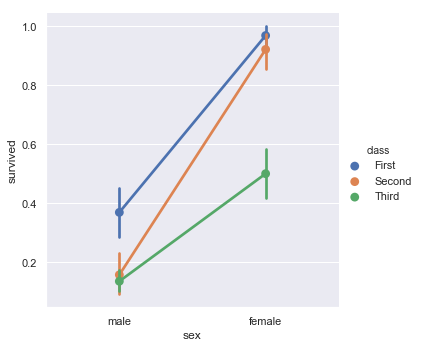

In [174]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'point', data = titanic)

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

In [53]:
x = randn(100)

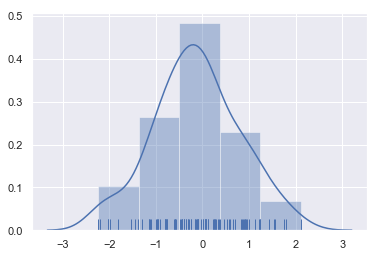

In [58]:
sns.distplot(x, kde = True, hist = True, rug= True, bins= 5)

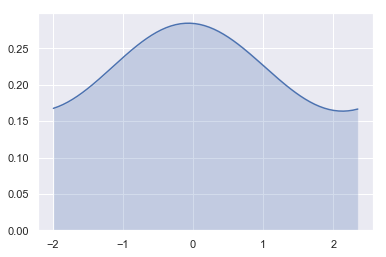

In [191]:
sns.kdeplot(x, shade=True, cbar = True, bw = 1, cut = 0)

In [193]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [194]:
x = tips['total_bill']
y = tips['tip']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


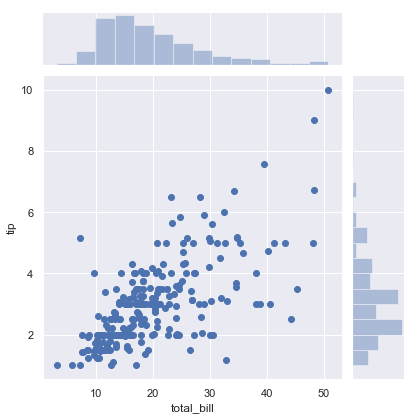

In [195]:
sns.jointplot(x = x, y=y)

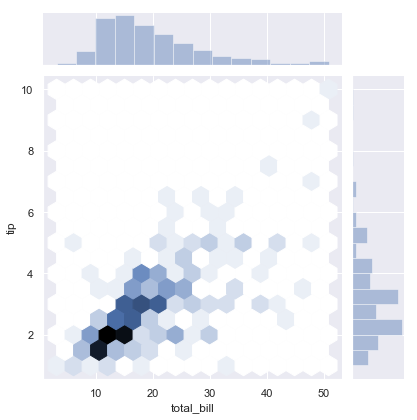

In [199]:
sns.set()
sns.jointplot(x = x, y=y, kind = 'hex')

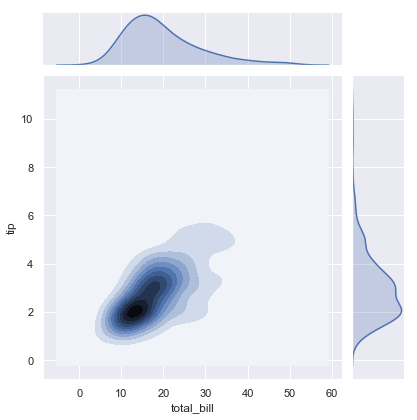

In [200]:
sns.jointplot(x = x, y = y, kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


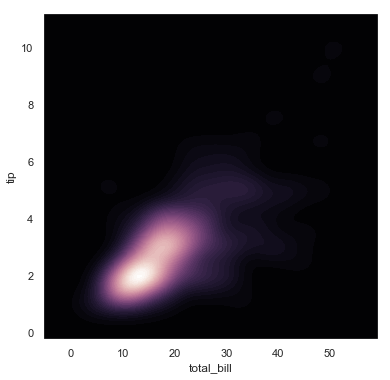

In [201]:
f, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse= True)
sns.kdeplot(x, y, cmap = cmap, n_levels=60, shade=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


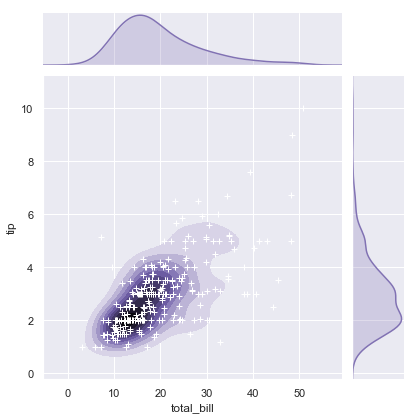

In [203]:
g = sns.jointplot(x, y, kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

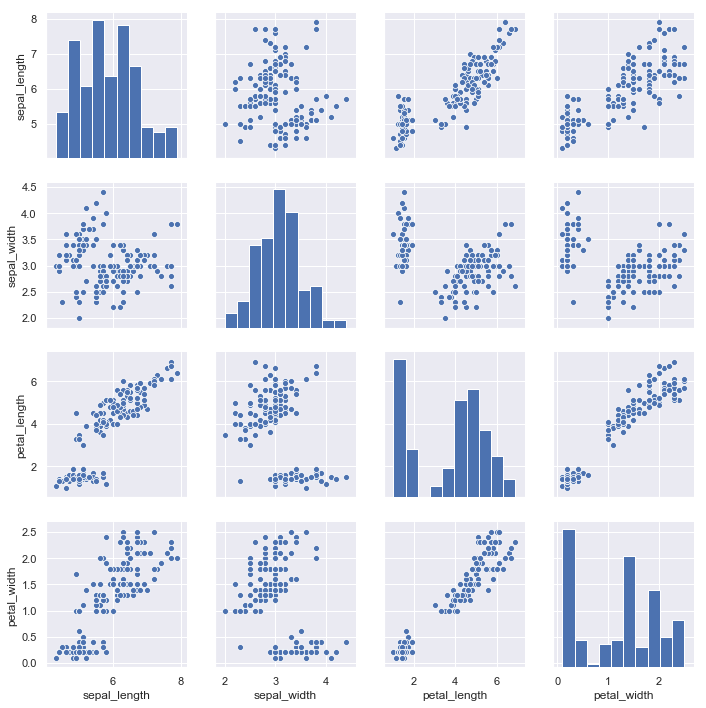

In [205]:
sns.pairplot(iris)

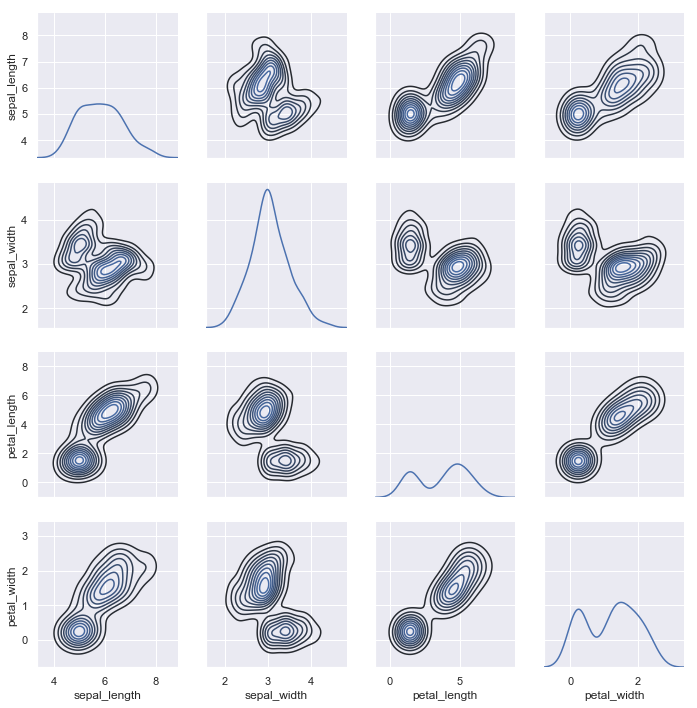

In [207]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

In [208]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


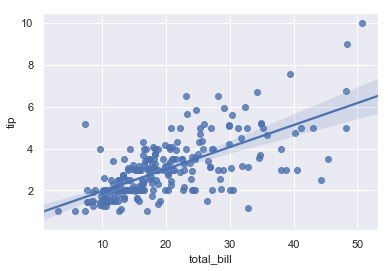

In [209]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

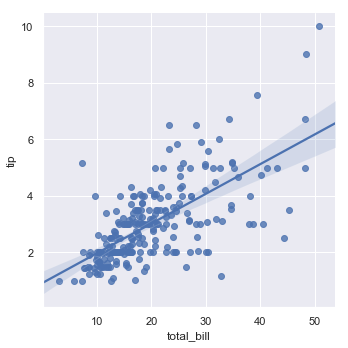

In [212]:
sns.lmplot(x = 'total_bill', y= 'tip', data = tips)

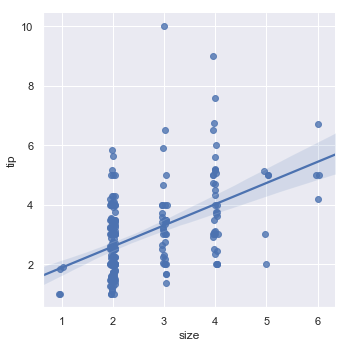

In [215]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = 0.05)

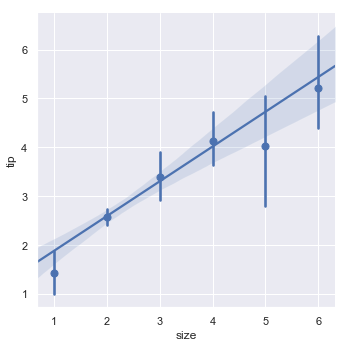

In [218]:
sns.lmplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)

In [220]:
data = sns.load_dataset('anscombe')
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [221]:
data['dataset'].value_counts()

III    11
II     11
IV     11
I      11
Name: dataset, dtype: int64

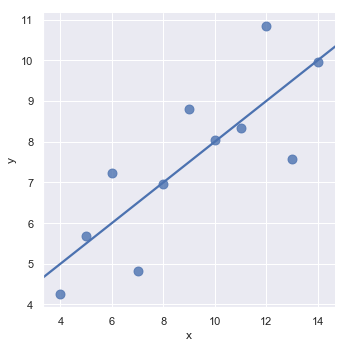

In [222]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'I'"), ci = None, scatter_kws={'s': 80})

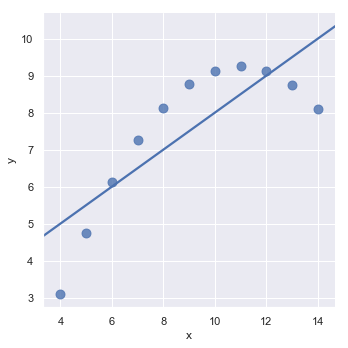

In [226]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'II'"), ci = None, scatter_kws={'s': 80}, order = 1)

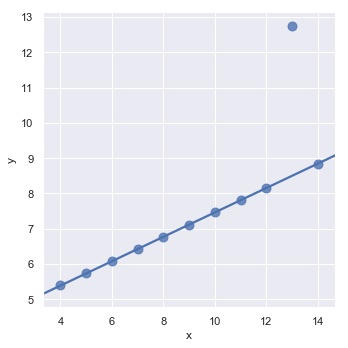

In [228]:
sns.lmplot(x = 'x', y = 'y', data = data.query("dataset == 'III'"), ci = None, scatter_kws={'s': 80}, robust=True)

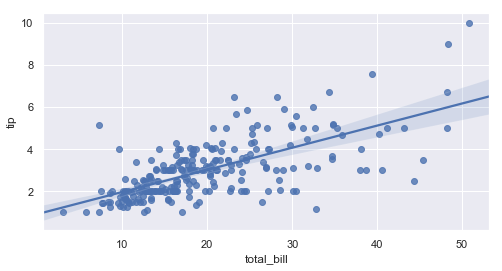

In [240]:
f, ax = plt.subplots(figsize = (8,4))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax)

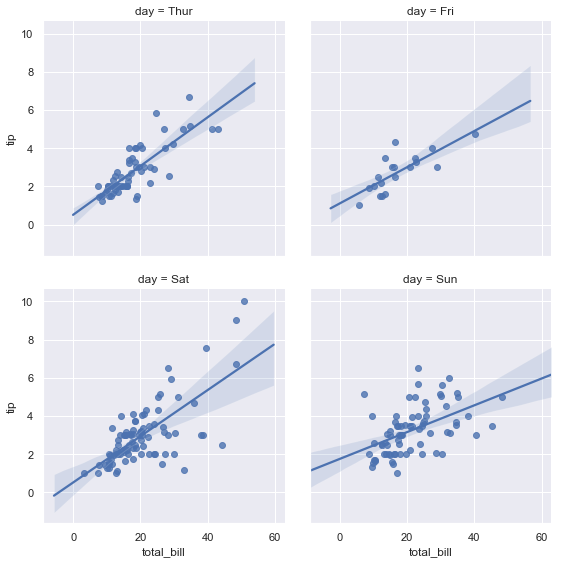

In [244]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', col_wrap=2, height = 4)

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [245]:
def sinplot(flip = 1):
    x = np.linspace(0, 14, 100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

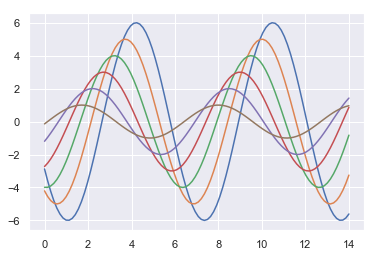

In [247]:
sinplot(-1)

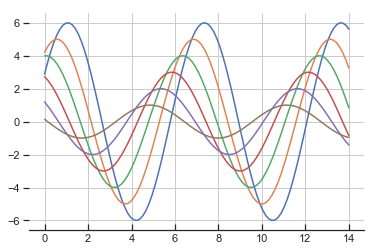

In [260]:
sns.set_style('ticks', {'axes.grid': True, 'xtick.direction': 'in'})
sinplot()
sns.despine(left = True, bottom= False)

In [257]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [262]:
sns.set_style('darkgrid')

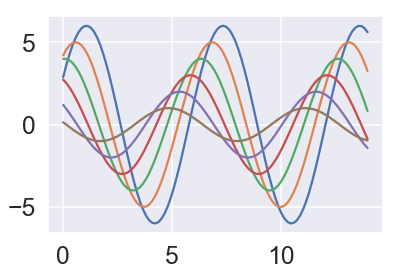

In [267]:
sns.set_context('talk', font_scale=1.5)
sinplot()

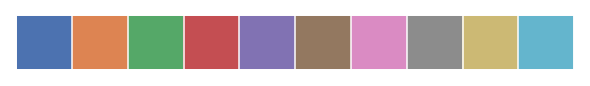

In [270]:
current_palettes = sns.color_palette()
sns.palplot(current_palettes)

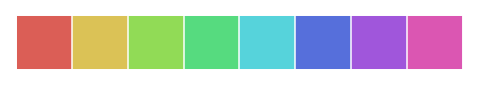

In [271]:
sns.palplot(sns.color_palette('hls', 8))